# Data Preparation

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Project Dataset (Train).csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2024 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2024 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.shape

(10683, 11)

##Data cleaning

In [ ]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
#Droping Nan values if any values are present

In [ ]:
df.dropna(inplace=True)
df = df.dropna()

In [ ]:
#converting Duration into minutes

In [ ]:
def duration_to_minutes(duration):
    # Convert duration to string if it's not already
    if not isinstance(duration, str):
        duration = str(duration)
    # Split the duration string into hours and minutes parts
    parts = duration.split()
    total_minutes = 0
    for part in parts:
        if 'h' in part:
            # Extract hours and convert to minutes
            total_minutes += int(part[:-1]) * 60
        elif 'm' in part:
            # Extract minutes
            total_minutes += int(part[:-1])
    return total_minutes

In [ ]:
df['Duration']=df['Duration'].apply(duration_to_minutes)

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2024 01:10,170,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2024 04:25,1140,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1 stop,No info,13302


In [ ]:
df['Total_Stops']=df['Total_Stops'].str.replace('non-stop','0')

In [ ]:
df['Total_Stops']=df['Total_Stops'].str.split(' ').str.get(0).astype(int)

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2024 01:10,170,0,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2024 04:25,1140,2,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1,No info,13302


In [ ]:
duplicates = df[df.duplicated()]
duplicates

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,01-06-2019,Delhi,Cochin,DEL ? NAG ? BOM ? COK,14:35,02-06-2024 04:25,830,2,No info,13376
1061,Air India,21-05-2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,22-05-2024 19:15,1275,2,No info,10231
1348,Air India,18-05-2019,Delhi,Cochin,DEL ? HYD ? BOM ? COK,17:15,19-05-2024 19:15,1560,2,No info,12392
1418,Jet Airways,06-06-2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,05:30,07-06-2024 04:25,1375,2,In-flight meal not included,10368
1674,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,18:25,21:20,175,0,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27-06-2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,28-06-2024 12:35,810,2,No info,12819
10616,Jet Airways,01-06-2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,09:40,02-06-2024 12:35,1615,2,No info,13014
10634,Jet Airways,06-06-2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,09:40,07-06-2024 12:35,1615,2,In-flight meal not included,11733
10672,Jet Airways,27-06-2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,28-06-2024 19:00,1195,2,In-flight meal not included,11150


In [ ]:
df.drop_duplicates(inplace=True)
df = df.drop_duplicates()

In [ ]:
df = df.drop_duplicates()

In [ ]:
# Replacing the ? marke which is observed in column with to and storing it in df['Route']
df['Route']=df['Route'].str.replace('?','to')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR to DEL,22:20,22-03-2024 01:10,170,0,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU to IXR to BBI to BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL to LKO to BOM to COK,09:25,10-06-2024 04:25,1140,2,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU to NAG to BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR to NAG to DEL,16:50,21:35,285,1,No info,13302


In [ ]:
# Creating new columns Date,Month and Year
#also droping the the Date_of_Journey column

df["Date"]=df['Date_of_Journey'].apply(lambda x:x.split("-")[0]).astype(int)
df["Month"]=df['Date_of_Journey'].apply(lambda x:x.split("-")[1]).astype(int)
df["Year"]=df['Date_of_Journey'].apply(lambda x:x.split("-")[2]).astype(int)



df = df.drop(columns=['Date_of_Journey'])
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR to DEL,22:20,22-03-2024 01:10,170,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU to IXR to BBI to BLR,05:50,13:15,445,2,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL to LKO to BOM to COK,09:25,10-06-2024 04:25,1140,2,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU to NAG to BLR,18:05,23:30,325,1,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR to NAG to DEL,16:50,21:35,285,1,No info,13302,1,3,2019


In [ ]:
# Creating new columns Departure hour and Departure Minutes
# and droping Dep_Time column
df['Dep_Hour'] = df['Dep_Time'].apply(lambda x: int(x.split(':')[0]))
df['Dep_Min'] = df['Dep_Time'].apply(lambda x: int(x.split(':')[1]))


df = df.drop(columns=['Dep_Time'])
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR to DEL,22-03-2024 01:10,170,0,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU to IXR to BBI to BLR,13:15,445,2,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL to LKO to BOM to COK,10-06-2024 04:25,1140,2,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU to NAG to BLR,23:30,325,1,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR to NAG to DEL,21:35,285,1,No info,13302,1,3,2019,16,50


In [ ]:
len('13:15')

5

In [ ]:
len("22-03-2024 01:10")

16

In [ ]:
#Remove the unwanted part of Arrival Time column

def get_last_four(data):
    if len(data) == 16:
        time = data[11:]
    else:
        time = data
    return time

In [ ]:
get_last_four('22-03-2024 01:10')


'01:10'

In [ ]:
get_last_four('13:15')

'13:15'

In [ ]:
df['Arrival_Time']=df['Arrival_Time'].apply(get_last_four)

In [ ]:
df['Arrival_Time'].unique()


array(['01:10', '13:15', '04:25', '23:30', '21:35', '11:25', '10:25',
       '05:05', '19:15', '23:00', '22:55', '13:55', '09:20', '19:50',
       '12:35', '19:20', '13:20', '06:50', '21:50', '08:15', '03:35',
       '12:55', '23:15', '21:00', '20:20', '16:45', '19:00', '18:10',
       '15:15', '08:35', '11:05', '14:15', '10:55', '00:15', '02:45',
       '12:00', '23:55', '01:30', '09:25', '15:25', '15:35', '08:30',
       '10:05', '14:30', '07:55', '10:35', '22:35', '04:40', '07:25',
       '20:45', '14:25', '22:30', '23:20', '07:40', '22:50', '14:35',
       '08:55', '18:50', '09:05', '01:35', '09:40', '16:25', '11:10',
       '17:05', '17:50', '23:10', '08:45', '07:45', '16:10', '00:55',
       '23:35', '20:00', '00:40', '21:45', '18:15', '03:25', '04:15',
       '21:10', '21:05', '09:45', '18:05', '22:00', '15:30', '08:50',
       '08:00', '19:35', '11:20', '10:15', '12:45', '02:20', '07:15',
       '11:50', '18:30', '19:45', '21:20', '20:05', '09:10', '22:20',
       '10:10', '01:

In [ ]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR to DEL,01:10,170,0,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU to IXR to BBI to BLR,13:15,445,2,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL to LKO to BOM to COK,04:25,1140,2,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU to NAG to BLR,23:30,325,1,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR to NAG to DEL,21:35,285,1,No info,13302,1,3,2019,16,50


In [ ]:
#Spliting Arrival_Time into Arrival_hour andd Arival_Min
#also droping original column

df['Arrival_hour'] = df['Arrival_Time'].apply(lambda x: int(x.split(':')[0]))
df['Arrival_min'] = df['Arrival_Time'].apply(lambda x: int(x.split(':')[1]))

df = df.drop(columns=['Arrival_Time'])
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR to DEL,170,0,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU to IXR to BBI to BLR,445,2,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL to LKO to BOM to COK,1140,2,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU to NAG to BLR,325,1,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR to NAG to DEL,285,1,No info,13302,1,3,2019,16,50,21,35


In [ ]:
df.shape

(10462, 15)

##Feature Selection

In [ ]:
# Taking onlu numerical columns

num_df = df.select_dtypes(int)
num_df.head()


,Duration,Total_Stops,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
0,170,0,3897,24,3,2019,22,20,1,10
1,445,2,7662,1,5,2019,5,50,13,15
2,1140,2,13882,9,6,2019,9,25,4,25
3,325,1,6218,12,5,2019,18,5,23,30
4,285,1,13302,1,3,2019,16,50,21,35


In [ ]:
x_num = num_df.iloc[:,:]
x_num.head()

,Duration,Total_Stops,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
0,170,0,3897,24,3,2019,22,20,1,10
1,445,2,7662,1,5,2019,5,50,13,15
2,1140,2,13882,9,6,2019,9,25,4,25
3,325,1,6218,12,5,2019,18,5,23,30
4,285,1,13302,1,3,2019,16,50,21,35


In [ ]:
x_num.describe()

,Duration,Total_Stops,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.0,10462.000000,10462.000000,10462.000000,10462.000000
mean,629.781591,0.802332,9026.790289,13.463200,4.701491,2019.0,12.478494,24.404989,13.387689,24.719939
std,500.699045,0.660609,4624.849541,8.467493,1.163802,0.0,5.727227,18.815719,6.855547,16.570450
min,5.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000
25%,170.000000,0.000000,5224.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000
50%,505.000000,1.000000,8266.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000
75%,910.000000,1.000000,12344.750000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000
max,2860.000000,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000


In [ ]:
corr = x_num.corr()
corr

,Duration,Total_Stops,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
Duration,1.000000,0.727982,0.501758,-0.029810,0.004874,NaN,-0.001285,-0.019225,0.061912,-0.070977
Total_Stops,0.727982,1.000000,0.602013,-0.018937,0.039003,NaN,-0.067523,-0.002695,0.051476,-0.107099
Price,0.501758,0.602013,1.000000,-0.159044,-0.113396,NaN,0.005155,-0.024155,0.031023,-0.086163
Date,-0.029810,-0.018937,-0.159044,1.000000,-0.038331,NaN,-0.003394,-0.004741,-0.002448,-0.015086
Month,0.004874,0.039003,-0.113396,-0.038331,1.000000,NaN,0.040406,-0.062636,0.001423,-0.099261
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Hour,-0.001285,-0.067523,0.005155,-0.003394,0.040406,NaN,1.000000,-0.015068,-0.003827,0.072989
Dep_Min,-0.019225,-0.002695,-0.024155,-0.004741,-0.062636,NaN,-0.015068,1.000000,0.046564,-0.021353
Arrival_hour,0.061912,0.051476,0.031023,-0.002448,0.001423,NaN,-0.003827,0.046564,1.000000,-0.152036
Arrival_min,-0.070977,-0.107099,-0.086163,-0.015086,-0.099261,NaN,0.072989,-0.021353,-0.152036,1.000000


## Heat Map

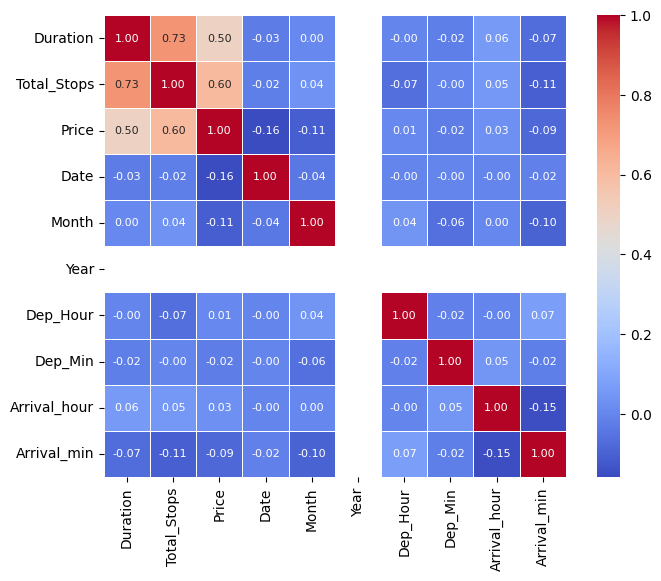

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))  # Adjust the figure size as needed
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5, annot_kws={"size": 8})

plt.show()

In [ ]:
df['Additional_Info'].unique()


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
df['Additional_Info']=df['Additional_Info'].str.replace('-','')
df['Additional_Info'].unique()

array(['No info', 'Inflight meal not included',
       'No checkin baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Redeye flight', '2 Long layover'], dtype=object)

In [ ]:
cat_df = df.select_dtypes(object)
cat_df.head()

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR to DEL,No info
1,Air India,Kolkata,Banglore,CCU to IXR to BBI to BLR,No info
2,Jet Airways,Delhi,Cochin,DEL to LKO to BOM to COK,No info
3,IndiGo,Kolkata,Banglore,CCU to NAG to BLR,No info
4,IndiGo,Banglore,New Delhi,BLR to NAG to DEL,No info


In [ ]:
t_df = df['Price']
t_df

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

In [ ]:
con_df = pd.concat([cat_df,t_df],axis=1)
con_df.head()

,Airline,Source,Destination,Route,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR to DEL,No info,3897
1,Air India,Kolkata,Banglore,CCU to IXR to BBI to BLR,No info,7662
2,Jet Airways,Delhi,Cochin,DEL to LKO to BOM to COK,No info,13882
3,IndiGo,Kolkata,Banglore,CCU to NAG to BLR,No info,6218
4,IndiGo,Banglore,New Delhi,BLR to NAG to DEL,No info,13302


##Chi squared Test

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in con_df.columns:
    con_df[col] = le.fit_transform(con_df[col])



con_df.head()

,Airline,Source,Destination,Route,Additional_Info,Price
0,3,0,5,18,8,65
1,1,3,0,84,8,669
2,4,2,1,118,8,1537
3,3,3,0,91,8,389
4,3,0,5,29,8,1457


In [ ]:
from sklearn.feature_selection import chi2
x = con_df.iloc[:,:-1]
x

,Airline,Source,Destination,Route,Additional_Info
0,3,0,5,18,8
1,1,3,0,84,8
2,4,2,1,118,8
3,3,3,0,91,8
4,3,0,5,29,8
...,...,...,...,...,...
10678,0,3,0,64,8
10679,1,3,0,64,8
10680,4,0,2,18,8
10681,10,0,5,18,8


In [ ]:
y = con_df['Price']

In [ ]:
chi_scores = chi2(x,y)
chi_scores
# Higher the values higher is the importance of the veriable  ,,,

(array([ 13861.70067169,   7350.60777731,  15312.1067054 , 186276.91621262,
          1910.46675283]),
 array([0.        , 0.        , 0.        , 0.        , 0.24693465]))

<Axes: >

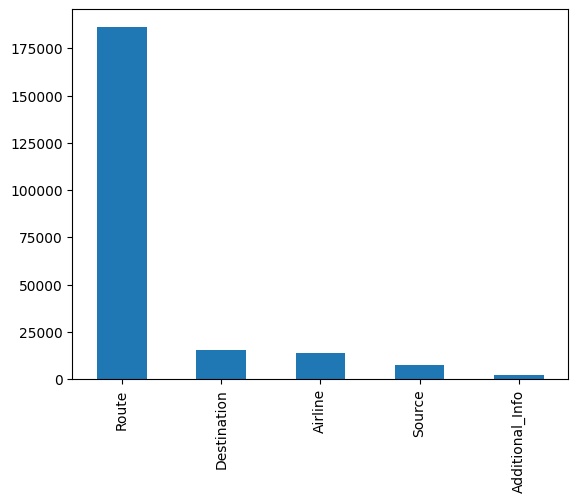

In [ ]:
# Plotting the graph with chi values
chi_values = pd.Series(chi_scores[0],index=x.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<Axes: >

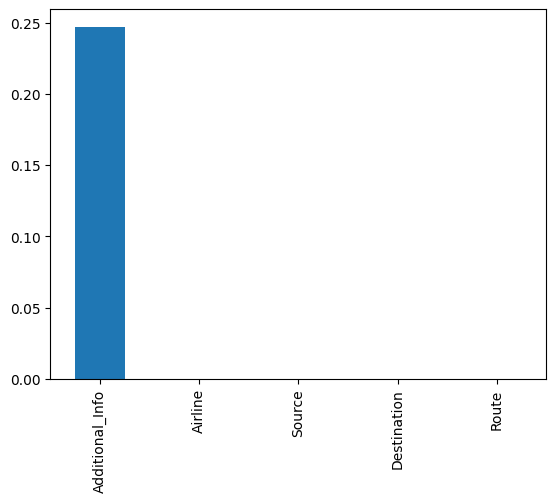

In [ ]:
# Plotting with p values ,, Higher the p value lowear the importance
p_values = pd.Series(chi_scores[1],index=x.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

In [ ]:
df = df.drop(columns=['Additional_Info'])

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR to DEL,170,0,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU to IXR to BBI to BLR,445,2,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL to LKO to BOM to COK,1140,2,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU to NAG to BLR,325,1,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR to NAG to DEL,285,1,13302,1,3,2019,16,50,21,35


In [ ]:
df.to_csv("Cleaned Data 2.csv")

In [ ]:
df = pd.read_csv("/content/Cleaned Data 2")
df.head()

,Unnamed: 0,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
0,0,IndiGo,Banglore,New Delhi,BLR to DEL,170,0,3897,24,3,2019,22,20,1,10
1,1,Air India,Kolkata,Banglore,CCU to IXR to BBI to BLR,445,2,7662,1,5,2019,5,50,13,15
2,2,Jet Airways,Delhi,Cochin,DEL to LKO to BOM to COK,1140,2,13882,9,6,2019,9,25,4,25
3,3,IndiGo,Kolkata,Banglore,CCU to NAG to BLR,325,1,6218,12,5,2019,18,5,23,30
4,4,IndiGo,Banglore,New Delhi,BLR to NAG to DEL,285,1,13302,1,3,2019,16,50,21,35


In [ ]:
# Taking all independent features into x and droping unrequired columns
x = df.drop(columns=['Price','Unnamed: 0','Year'])
x.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Date,Month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR to DEL,170,0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU to IXR to BBI to BLR,445,2,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL to LKO to BOM to COK,1140,2,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU to NAG to BLR,325,1,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR to NAG to DEL,285,1,1,3,16,50,21,35


In [ ]:
# Taking dependent feature into y
y = df['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

#One Hot Encoding

In [ ]:
#Spliting data into traning and testing data with test size 0.2 (20%)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Importing OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder().fit(x[['Airline','Source','Destination','Route']])

In [ ]:
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Airline','Source','Destination','Route']),remainder='passthrough')



#Linear Regression

In [ ]:
#Importing LinearRegression model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
# Creating pipeline of column_trans and linear reg

from sklearn.pipeline import make_pipeline
pipe = make_pipeline(column_trans,reg)

In [ ]:
# Fitting traning data to pipe

pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
       'Vistara', 'Vistara Premium economy'], dtype=object),
                                                                            array(['Banglo...
       'DEL to IXU to BOM to COK', 'DEL to JAI to BOM to COK',
       'DEL to JDH to BOM to COK', 'DEL to LKO to BOM to COK',
       'DEL to LKO to COK', 'DEL to MAA to BOM to COK',
       'DEL to MAA to COK', 'DEL to NAG to BOM to COK',
       'DEL to PNQ to COK', 'DEL to RPR to NAG to BOM to COK',
       'DEL to TRV to COK', 'DEL to UDR to BOM to COK', 'MAA to CCU'],
      dtype=object)]),
                                                  ['Airline', 'Source',
                                                   'Destination', 'Route'])])),
                ('linearregression', LinearRegression())])

In [ ]:
# Prediction of x_test
y_pred = pipe.predict(x_test)

In [ ]:
# To check performance of model using MAPE and R-Squared metrics

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.22030090001678732

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6403338034231874

In [ ]:
# Making some predictions on raw data
pipe.predict(pd.DataFrame([["Jet Airways", "Delhi", "Cochin", "DEL to LKO to BOM to COK", 1140, 2, 9, 6, 9, 25, 4, 25]],columns=['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Date', 'Month', 'Dep_Hour', 'Dep_Min', 'Arrival_hour', 'Arrival_min']))

array([14127.25643228])

In [ ]:
x_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Date,Month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
1709,Jet Airways,Kolkata,Banglore,CCU to DEL to BLR,1325,1,6,5,17,0,15,5
3068,Jet Airways,Delhi,Cochin,DEL to BOM to COK,1105,1,18,5,10,0,4,25
207,Vistara,Banglore,Delhi,BLR to DEL,155,0,27,6,17,0,19,35
7303,Jet Airways,Delhi,Cochin,DEL to BHO to BOM to COK,425,2,6,6,5,30,12,35
6814,Jet Airways,Banglore,New Delhi,BLR to BOM to DEL,1090,1,1,3,14,5,8,15
...,...,...,...,...,...,...,...,...,...,...,...,...
8457,Jet Airways,Mumbai,Hyderabad,BOM to HYD,85,0,1,5,7,5,8,30
7069,IndiGo,Kolkata,Banglore,CCU to BBI to BLR,220,1,9,6,19,35,23,15
1116,Vistara,Kolkata,Banglore,CCU to DEL to BLR,1555,1,21,5,7,10,9,5
866,Jet Airways,Mumbai,Hyderabad,BOM to HYD,90,0,12,3,19,40,21,10


In [ ]:
x_test

,Airline,Source,Destination,Route,Duration,Total_Stops,Date,Month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
4452,Air Asia,Delhi,Cochin,DEL to BLR to COK,870,1,27,4,7,55,22,25
4365,IndiGo,Mumbai,Hyderabad,BOM to HYD,90,0,27,5,9,10,10,40
6530,Air India,Kolkata,Banglore,CCU to IXR to DEL to BLR,1045,2,12,6,5,50,23,15
5967,SpiceJet,Chennai,Kolkata,MAA to CCU,155,0,24,3,9,30,12,5
8075,Air India,Delhi,Cochin,DEL to HYD to MAA to COK,1210,2,27,5,13,15,9,25
...,...,...,...,...,...,...,...,...,...,...,...,...
10228,Jet Airways,Kolkata,Banglore,CCU to BOM to BLR,590,1,1,5,8,25,18,15
10307,GoAir,Banglore,Delhi,BLR to DEL,170,0,21,6,11,40,14,30
2606,Jet Airways,Kolkata,Banglore,CCU to DEL to BLR,1570,1,6,5,17,0,19,10
2011,Air India,Delhi,Cochin,DEL to BOM to COK,615,1,1,6,9,0,19,15


In [ ]:
y_test

3673    10808
2643     7229
1437     4823
748      8040
171      8246
        ...  
2849    11789
2784     4878
7664     4668
3016     6938
7827     5088
Name: Price, Length: 2093, dtype: int64

In [ ]:
# Trying to reduce MAPE with running for loop for 100 times to khow at what random_state value we get improved results
score = []
for i in range(1000):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  pipe.fit(x_train,y_train)
  y_pred = pipe.predict(x_test)
  score.append(r2_score(y_test,y_pred))

In [ ]:
# Checking maximum score

np.argmax(score)

170

In [ ]:
# Checking maximum r2_score

score[np.argmax(score)]

0.7418552916071064

In [ ]:
# Retraning model with new random_state

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=np.argmax(score))
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred)*100)

0.7418552916071064
21.25445388072118


#Plotting Best Fit Line

In [ ]:
# Cluculating slope and intercept

slope, intercept = np.polyfit(y_test, y_pred, 1)

In [ ]:
# x_values are true values

x_values = np.array([min(y_test), max(y_test)])

In [ ]:
# y_values are predicted values

y_values = slope * x_values + intercept

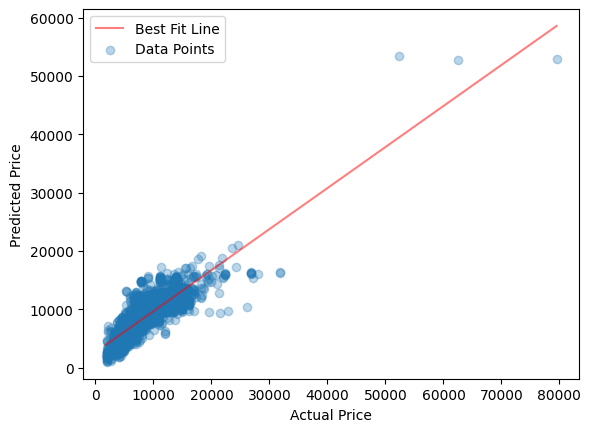

In [ ]:
# plotting scatter plot and Best fit line

import matplotlib.pyplot as plt
plt.plot(x_values, y_values, color='red',label='Best Fit Line',alpha=0.5)
plt.scatter(y_test, y_pred, label='Data Points',alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()

Predicting on test data

In [ ]:
x.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Date,Month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR to DEL,170,0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU to IXR to BBI to BLR,445,2,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL to LKO to BOM to COK,1140,2,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU to NAG to BLR,325,1,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR to NAG to DEL,285,1,1,3,16,50,21,35


In [ ]:
pipe.predict(pd.DataFrame([[
    'Air Asia',
    'Delhi',
    'Cochin',
    'DEL to BLR to COK',
    870,
    1,
    27,
    4,
    7,
    55,
    22,
    25
]],columns=['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Date', 'Month', 'Dep_Hour', 'Dep_Min', 'Arrival_hour', 'Arrival_min']))

array([6383.4182854])

In [ ]:
pipe.predict(pd.DataFrame([[
    'IndiGo',
    'Mumbai',
    'Hyderabad',
    'BOM to HYD',
    90,
    0,
    27,
    5,
    9,
    10,
    10,
    40
]], columns=['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Date', 'Month', 'Dep_Hour', 'Dep_Min', 'Arrival_hour', 'Arrival_min']))

array([1782.03318437])

In [ ]:
pipe.predict(pd.DataFrame([[
    'Air India',
    'Kolkata',
    'Banglore',
    'CCU to IXR to DEL to BLR',
    1045,
    2,
    12,
    6,
    5,
    50,
    23,
    15
]],columns=['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Date', 'Month', 'Dep_Hour', 'Dep_Min', 'Arrival_hour', 'Arrival_min']))

array([10877.69177379])

In [ ]:
pipe.predict(pd.DataFrame([[
    'SpiceJet',
    'Chennai',
    'Kolkata',
    'MAA to CCU',
    155,
    0,
    24,
    3,
    9,
    30,
    12,
    5
]], columns=['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Date', 'Month', 'Dep_Hour', 'Dep_Min', 'Arrival_hour', 'Arrival_min']))

array([4118.17363436])

In [ ]:
pipe.predict(pd.DataFrame([[
    'Air India',
    'Delhi',
    'Cochin',
    'DEL to HYD to MAA to COK',
    1210,
    2,
    27,
    5,
    13,
    15,
    9,
    25
]], columns=['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Date', 'Month', 'Dep_Hour', 'Dep_Min', 'Arrival_hour', 'Arrival_min']))

array([7757.24631701])

In [ ]:
pipe.predict(pd.DataFrame([[
    "Jet Airways",
    "Kolkata",
    "Banglore",
    "CCU to BOM to BLR",
    590,
    1,
    1,
    5,
    8,
    25,
    18,
    15,
]], columns=['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Date', 'Month', 'Dep_Hour', 'Dep_Min', 'Arrival_hour', 'Arrival_min']))

array([12448.86807817])

In [ ]:
pipe.predict(pd.DataFrame([[
    "GoAir",
    "Banglore",
    "Delhi",
    "BLR to DEL",
    170,
    0,
    21,
    6,
    11,
    40,
    14,
    30
]], columns=['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Date', 'Month', 'Dep_Hour', 'Dep_Min', 'Arrival_hour', 'Arrival_min']))

array([2364.4493877])

In [ ]:
pipe.predict(pd.DataFrame([[
    "Jet Airways",
    "Kolkata",
    "Banglore",
    "CCU to DEL to BLR",
    1570,
    1,
    6,
    5,
    17,
    0,
    19,
    10
]], columns=['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Date', 'Month', 'Dep_Hour', 'Dep_Min', 'Arrival_hour', 'Arrival_min']))

array([12102.0610717])

In [ ]:
pipe.predict(pd.DataFrame([[
    'Air India',
    'Delhi',
    'Cochin',
    'DEL to BOM to COK',
    615,
    1,
    1,
    6,
    9,
    0,
    19,
    15
]], columns=['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Date', 'Month', 'Dep_Hour', 'Dep_Min', 'Arrival_hour', 'Arrival_min']))

array([10405.90002043])

In [ ]:
pipe.predict(pd.DataFrame([[
    "Air India",
    "Delhi",
    "Cochin",
    "DEL to LKO to BOM to COK",
    1470,
    2,
    3,
    6,
    7,
    10,
    7,
    40
]], columns=['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Date', 'Month', 'Dep_Hour', 'Dep_Min', 'Arrival_hour', 'Arrival_min']))

array([12433.66430661])